In [2]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import numpy as np
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [1]:
import kagglehub


path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/gtsrb-german-traffic-sign


In [5]:
import shutil
import os

source_dir = path
dest_dir = '/kaggle/working/gtsrb-german-traffic-sign'

# Copy the entire dataset directory
shutil.copytree(source_dir, dest_dir)

print("Data copied successfully to:", dest_dir)

Data copied successfully to: /kaggle/working/gtsrb-german-traffic-sign


In [6]:
path=dest_dir

In [7]:
# Make folders in Test folder
import os
import pandas as pd
import shutil

test_folder = os.path.join(path, "Test")
csv_path = os.path.join(path, "Test.csv")


df = pd.read_csv(csv_path)


for index, row in df.iterrows():
    img_id = str(row["ClassId"])
    img_path = os.path.join(path, row["Path"])
    dest_folder = os.path.join(test_folder, img_id)


    os.makedirs(dest_folder, exist_ok=True)


    dest_path = os.path.join(dest_folder, os.path.basename(img_path))


    if os.path.exists(img_path):
        shutil.move(img_path, dest_path)
        print(f"Moved: {img_path} → {dest_path}")
    else:
        print(f"Warning: Image not found at path {img_path}")


Streaming output truncated to the last 5000 lines.
Moved: /kaggle/working/gtsrb-german-traffic-sign/Test/07630.png → /kaggle/working/gtsrb-german-traffic-sign/Test/1/07630.png
Moved: /kaggle/working/gtsrb-german-traffic-sign/Test/07631.png → /kaggle/working/gtsrb-german-traffic-sign/Test/6/07631.png
Moved: /kaggle/working/gtsrb-german-traffic-sign/Test/07632.png → /kaggle/working/gtsrb-german-traffic-sign/Test/35/07632.png
Moved: /kaggle/working/gtsrb-german-traffic-sign/Test/07633.png → /kaggle/working/gtsrb-german-traffic-sign/Test/11/07633.png
Moved: /kaggle/working/gtsrb-german-traffic-sign/Test/07634.png → /kaggle/working/gtsrb-german-traffic-sign/Test/4/07634.png
Moved: /kaggle/working/gtsrb-german-traffic-sign/Test/07635.png → /kaggle/working/gtsrb-german-traffic-sign/Test/2/07635.png
Moved: /kaggle/working/gtsrb-german-traffic-sign/Test/07636.png → /kaggle/working/gtsrb-german-traffic-sign/Test/38/07636.png
Moved: /kaggle/working/gtsrb-german-traffic-sign/Test/07637.png → /kagg

In [10]:
# removing unncessary data items not required for model

lst=['0','1','2','3','4','5','7','8','14','26']

fs= os.listdir(path+'/Train')

for f in fs:
    if f not in lst:
        shutil.rmtree(path+'/Train/'+f)
        print("Deleted",f)
        shutil.rmtree(path+'/Test/'+f)




Deleted 21
Deleted 18
Deleted 33
Deleted 34
Deleted 41
Deleted 16
Deleted 30
Deleted 10
Deleted 37
Deleted 27
Deleted 29
Deleted 38
Deleted 22
Deleted 39
Deleted 9
Deleted 6
Deleted 13
Deleted 35
Deleted 17
Deleted 32
Deleted 42
Deleted 23
Deleted 24
Deleted 11
Deleted 19
Deleted 40
Deleted 25
Deleted 15
Deleted 28
Deleted 20
Deleted 12
Deleted 36
Deleted 31


In [12]:
os.remove(path+'/Test/GT-final_test.csv')

In [57]:

IMG_WIDTH , IMG_HEIGHT= 128,128

# class names
class_names = {
    0: "Speed Limit 20",
    1: "Speed Limit 30",
    2: "Speed Limit 50",
    3: "Speed Limit 60",
    4: "Speed Limit 70",
    5: "Speed Limit 80",
    6: "Speed Limit 100",
    7: "Speed Limit 120",
    8: "Stop Sign",
    9: "Green Light"
}
NUM_CLASSES = len(class_names)

In [15]:


#data augmentation for training images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


new_train_path=os.path.join(path,"Train")
new_test_path=os.path.join(path,"Test")

# For validation and test, only rescale
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load images
train_images = train_datagen.flow_from_directory(
  new_train_path,
    target_size=(IMG_WIDTH , IMG_HEIGHT),
    batch_size=32,
    class_mode='categorical'
)

test_images = val_test_datagen.flow_from_directory(
 new_test_path,
    target_size=(IMG_WIDTH , IMG_HEIGHT),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 14160 images belonging to 10 classes.
Found 4620 images belonging to 10 classes.


In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH , IMG_HEIGHT, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,930 (12.61 MB)

 Trainable params: 3,305,930 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(
    train_images,
    epochs=15,
    batch_size=32,

)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
443/443 ━━━━━━━━━━━━━━━━━━━━ 69s 144ms/step - accuracy: 0.2530 - loss: 1.9813
Epoch 2/15
443/443 ━━━━━━━━━━━━━━━━━━━━ 60s 137ms/step - accuracy: 0.3744 - loss: 1.6011
Epoch 3/15
443/443 ━━━━━━━━━━━━━━━━━━━━ 59s 134ms/step - accuracy: 0.4379 - loss: 1.4383
Epoch 4/15
443/443 ━━━━━━━━━━━━━━━━━━━━ 60s 135ms/step - accuracy: 0.5336 - loss: 1.2346
Epoch 5/15
443/443 ━━━━━━━━━━━━━━━━━━━━ 60s 135ms/step - accuracy: 0.6212 - loss: 1.0278
Epoch 6/15
443/443 ━━━━━━━━━━━━━━━━━━━━ 60s 136ms/step - accuracy: 0.6911 - loss: 0.8561
Epoch 7/15
443/443 ━━━━━━━━━━━━━━━━━━━━ 63s 143ms/step - accuracy: 0.7169 - loss: 0.7930
Epoch 8/15
443/443 ━━━━━━━━━━━━━━━━━━━━ 61s 137ms/step - accuracy: 0.7481 - loss: 0.6964
Epoch 9/15
443/443 ━━━━━━━━━━━━━━━━━━━━ 82s 136ms/step - accuracy: 0.7609 - loss: 0.6533
Epoch 10/15
443/443 ━━━━━━━━━━━━━━━━━━━━ 60s 136ms/step - accuracy: 0.7957 - loss: 0.5731
Epoch 11/15
443/443 ━━━━━━━━━━━━━━━━━━━━ 60s 136ms/step - accuracy: 0.8059 - loss: 0.5478
Epoch 12/15
443/443

In [19]:
test_loss, test_acc = model.evaluate(test_images)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")

145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8219 - loss: 0.5691

✅ Test Accuracy: 85.28%


In [30]:
model.save('traffic_sign_model.h5')

In [52]:
def load_and_preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image_resized = image.resize((IMG_WIDTH, IMG_HEIGHT))
    image_array = np.array(image_resized) / 255.0
    image_array = np.expand_dims(image_array, axis=0)
    return image, image_array

In [62]:

def predict_and_visualize(model, image_path):
    original_image, image_array = load_and_preprocess_image(image_path)
    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions)
    class_label = class_names.get(predicted_class_index, "Unknown")

    # Plot the image
    plt.figure(figsize=(4, 4))
    plt.imshow(original_image)
    plt.axis("off")
    plt.title(f"Prediction: {class_label}", fontsize=14, color='blue')
    plt.show()

    return predicted_class_index, class_label


In [38]:
#ignore if model already loaded
model = tf.keras.models.load_model('traffic_sign_model.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
Predicted class index: 1
Predicted class label: Speed Limit 30


(np.int64(1), 'Speed Limit 30')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


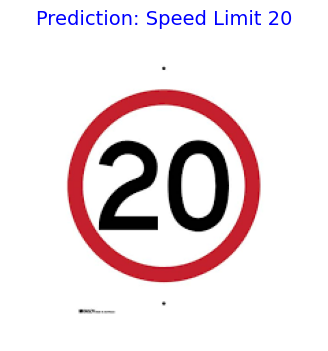

(np.int64(0), 'Speed Limit 20')

In [66]:
predict_and_visualize(model, "20.png")